<a href="https://colab.research.google.com/github/Giancawork/base-de-datos-challenge1-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



##En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [85]:
total1 = format(tienda1['Precio'].sum(),",")
total2 = format(tienda2['Precio'].sum(),",")
total3 = format(tienda3['Precio'].sum(),",")
total4 = format(tienda4['Precio'].sum(),",")
print(f'Ingreso Total Tienda1: {total1};Ingreso Total Tienda2: {total2};Ingreso Total Tienda3: {total3};Ingreso Total Tienda4: {total4}')

Ingreso Total Tienda1: 1,150,880,400.0;Ingreso Total Tienda2: 1,116,343,500.0;Ingreso Total Tienda3: 1,098,019,600.0;Ingreso Total Tienda4: 1,038,375,700.0


In [86]:
ingreso_tienda_global = [
    {"tienda": "tienda1", "ingreso": total1},
    {"tienda": "tienda2", "ingreso": total2},
    {"tienda": "tienda3", "ingreso": total3},
    {"tienda": "tienda4", "ingreso": total4}
]
print(ingreso_tienda_global)

[{'tienda': 'tienda1', 'ingreso': '1,150,880,400.0'}, {'tienda': 'tienda2', 'ingreso': '1,116,343,500.0'}, {'tienda': 'tienda3', 'ingreso': '1,098,019,600.0'}, {'tienda': 'tienda4', 'ingreso': '1,038,375,700.0'}]


# 2. Ventas por categoría

##En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [52]:
tiendas = [
    ("tienda1", tienda1),
    ("tienda2", tienda2),
    ("tienda3", tienda3),
    ("tienda4", tienda4)
]

In [53]:
top3_categoria_tienda_global = []
for nombre, df in tiendas:

    # Contar ventas por categoría
    conteo = (
        df["Categoría del Producto"]
        .value_counts()
        .nlargest(3)   # obtener top 3
    )

    # Guardar cada categoría del top 3 en el arreglo
    for categoria, total in conteo.items():
        top3_categoria_tienda_global.append({
            "tienda": nombre,
            "categoria": categoria,
            "total_ventas": int(total)
        })
print(top3_categoria_tienda_global)

[{'tienda': 'tienda1', 'categoria': 'Muebles', 'total_ventas': 465}, {'tienda': 'tienda1', 'categoria': 'Electrónicos', 'total_ventas': 448}, {'tienda': 'tienda1', 'categoria': 'Juguetes', 'total_ventas': 324}, {'tienda': 'tienda2', 'categoria': 'Muebles', 'total_ventas': 442}, {'tienda': 'tienda2', 'categoria': 'Electrónicos', 'total_ventas': 422}, {'tienda': 'tienda2', 'categoria': 'Juguetes', 'total_ventas': 313}, {'tienda': 'tienda3', 'categoria': 'Muebles', 'total_ventas': 499}, {'tienda': 'tienda3', 'categoria': 'Electrónicos', 'total_ventas': 451}, {'tienda': 'tienda3', 'categoria': 'Juguetes', 'total_ventas': 315}, {'tienda': 'tienda4', 'categoria': 'Muebles', 'total_ventas': 480}, {'tienda': 'tienda4', 'categoria': 'Electrónicos', 'total_ventas': 451}, {'tienda': 'tienda4', 'categoria': 'Juguetes', 'total_ventas': 338}]


# 3. Calificación promedio de la tienda


##En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [39]:
promedio1 = float(tienda1["Calificación"].mean())
print("Calificación promedio de la tienda1:", promedio1)

Calificación promedio de la tienda1: 3.976685036032217


In [40]:
promedio2 = float(tienda2["Calificación"].mean())
print("Calificación promedio de la tienda2:", promedio2)

Calificación promedio de la tienda2: 4.037303942348453


In [41]:
promedio3 = float(tienda3["Calificación"].mean())
print("Calificación promedio de la tienda3:", promedio3)

Calificación promedio de la tienda3: 4.048325561678677


In [42]:
promedio4 = float(tienda4["Calificación"].mean())
print("Calificación promedio de la tienda4:", promedio4)

Calificación promedio de la tienda4: 3.9957591178965224


In [43]:
calificacion_tienda_global = [
    {"tienda": "tienda1", "calificacion": promedio1},
    {"tienda": "tienda2", "calificacion": promedio2},
    {"tienda": "tienda3", "calificacion": promedio3},
    {"tienda": "tienda4", "calificacion": promedio4}
]
print(calificacion_tienda_global)

[{'tienda': 'tienda1', 'calificacion': 3.976685036032217}, {'tienda': 'tienda2', 'calificacion': 4.037303942348453}, {'tienda': 'tienda3', 'calificacion': 4.048325561678677}, {'tienda': 'tienda4', 'calificacion': 3.9957591178965224}]


# 4. Productos más y menos vendidos

##En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [55]:
tiendas = [
    ("tienda1", tienda1),
    ("tienda2", tienda2),
    ("tienda3", tienda3),
    ("tienda4", tienda4)
]

In [56]:
top3_productos_venta_tienda = []

for nombre, df in tiendas:

    # Contar ventas por producto y obtener el top 3
    conteo = (
        df["Producto"]
        .value_counts()
        .nlargest(3)    # top 3 productos más vendidos
    )

    # Guardar en el arreglo con ranking
    for rank, (producto, total) in enumerate(conteo.items(), start=1):
        top3_productos_venta_tienda.append({
            "tienda": nombre,
            "ranking": rank,           # 1 = más vendido, 2 = segundo, 3 = tercero
            "producto": producto,
            "cantidad": int(total)
        })
print (top3_productos_venta_tienda)

[{'tienda': 'tienda1', 'ranking': 1, 'producto': 'Microondas', 'cantidad': 60}, {'tienda': 'tienda1', 'ranking': 2, 'producto': 'TV LED UHD 4K', 'cantidad': 60}, {'tienda': 'tienda1', 'ranking': 3, 'producto': 'Armario', 'cantidad': 60}, {'tienda': 'tienda2', 'ranking': 1, 'producto': 'Iniciando en programación', 'cantidad': 65}, {'tienda': 'tienda2', 'ranking': 2, 'producto': 'Microondas', 'cantidad': 62}, {'tienda': 'tienda2', 'ranking': 3, 'producto': 'Batería', 'cantidad': 61}, {'tienda': 'tienda3', 'ranking': 1, 'producto': 'Kit de bancas', 'cantidad': 57}, {'tienda': 'tienda3', 'ranking': 2, 'producto': 'Mesa de comedor', 'cantidad': 56}, {'tienda': 'tienda3', 'ranking': 3, 'producto': 'Cama king', 'cantidad': 56}, {'tienda': 'tienda4', 'ranking': 1, 'producto': 'Cama box', 'cantidad': 62}, {'tienda': 'tienda4', 'ranking': 2, 'producto': 'Cubertería', 'cantidad': 59}, {'tienda': 'tienda4', 'ranking': 3, 'producto': 'Dashboards con Power BI', 'cantidad': 56}]


In [11]:
import matplotlib.pyplot as plt

###Tienda 1

In [64]:
df_t1 = pd.DataFrame([item for item in top3_productos_venta_tienda if item["tienda"] == "tienda1"])


<Axes: xlabel='producto'>

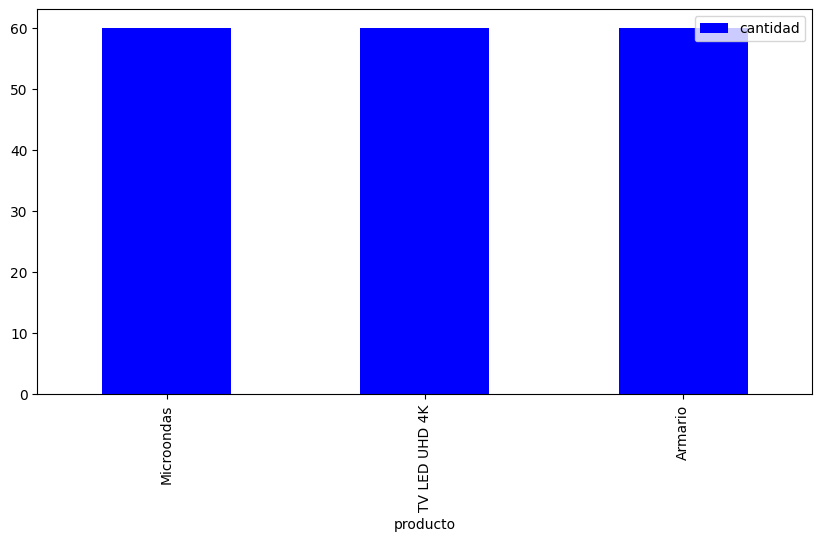

In [66]:
df_t1.plot(kind="bar", x="producto", y="cantidad", figsize=(10,5), color="blue")

###Tienda2

In [65]:
df_t2 = pd.DataFrame([item for item in top3_productos_venta_tienda if item["tienda"] == "tienda2"])


<Axes: xlabel='producto'>

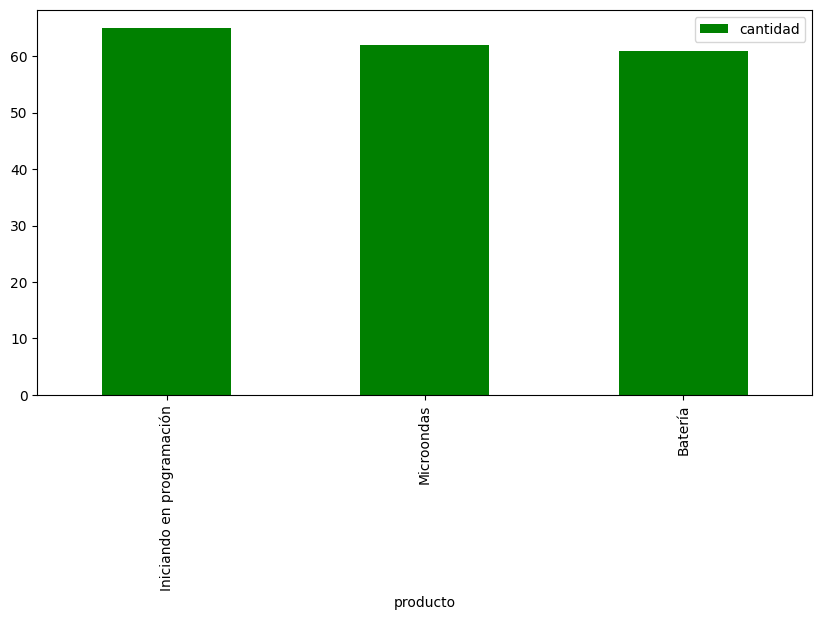

In [67]:
df_t2.plot(kind="bar", x="producto", y="cantidad", figsize=(10,5), color="green")

###Tienda 3

In [68]:
df_t3 = pd.DataFrame([item for item in top3_productos_venta_tienda if item["tienda"] == "tienda3"])

<Axes: xlabel='producto'>

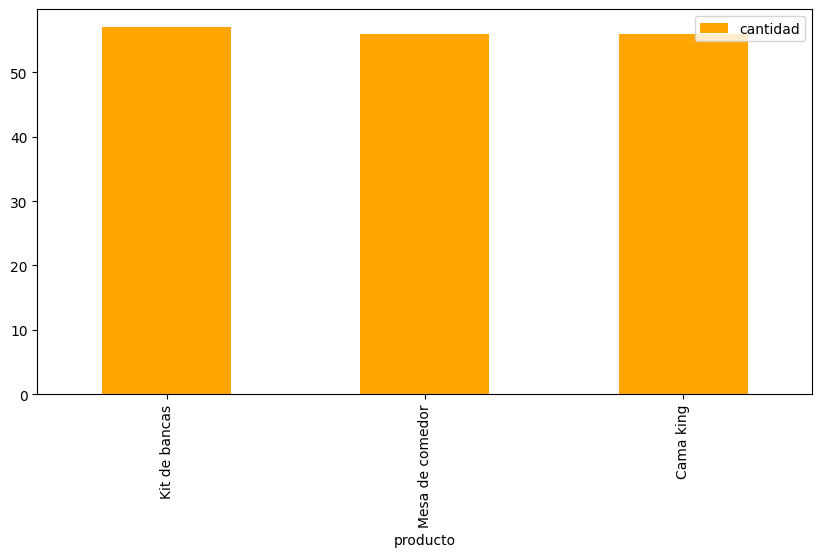

In [69]:
df_t3.plot(kind="bar", x="producto", y="cantidad", figsize=(10,5), color="orange")

###Tienda 4

In [70]:
df_t4 = pd.DataFrame([item for item in top3_productos_venta_tienda if item["tienda"] == "tienda4"])

<Axes: xlabel='producto'>

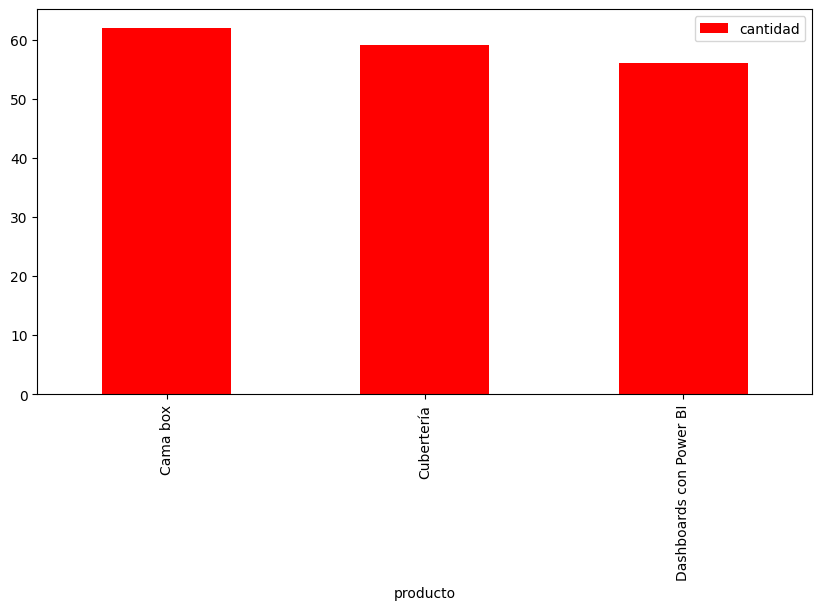

In [71]:
df_t4.plot(kind="bar", x="producto", y="cantidad", figsize=(10,5), color="red")

# 5. Envío promedio por tienda

##En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [27]:
promedio_t1 = float(tienda1["Costo de envío"].mean())
promedio_t2 = float(tienda2["Costo de envío"].mean())
promedio_t3 = float(tienda3["Costo de envío"].mean())
promedio_t4 = float(tienda4["Costo de envío"].mean())
print(promedio_t1,promedio_t2,promedio_t3,promedio_t4)

26018.60958033065 25216.235693090293 24805.680373039424 23459.457167090754


In [35]:
promedio_evio_tienda_global = [
    {"tienda": "tienda1", "promedio": promedio_t1},
    {"tienda": "tienda2", "promedio": promedio_t2},
    {"tienda": "tienda3", "promedio": promedio_t3},
    {"tienda": "tienda4", "promedio": promedio_t4}
]
print(promedio_evio_tienda_global)

[{'tienda': 'tienda1', 'promedio': 26018.60958033065}, {'tienda': 'tienda2', 'promedio': 25216.235693090293}, {'tienda': 'tienda3', 'promedio': 24805.680373039424}, {'tienda': 'tienda4', 'promedio': 23459.457167090754}]


#Generando gráfico

##Ingresos de la tienda - Grafico

In [84]:
print(ingreso_tienda_global)

[{'tienda': 'tienda1', 'ingreso': '1,150,880,400.0'}, {'tienda': 'tienda2', 'ingreso': '1,116,343,500.0'}, {'tienda': 'tienda3', 'ingreso': '1,098,019,600.0'}, {'tienda': 'tienda4', 'ingreso': '1,038,375,700.0'}]


<Axes: title={'center': 'Ingresos por tienda'}, ylabel='ingreso'>

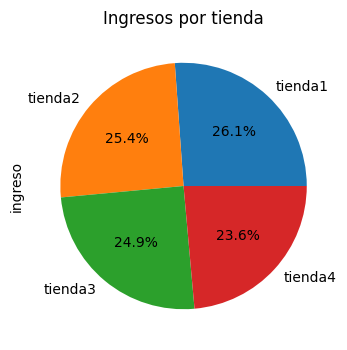

In [117]:
# Convertir a DataFrame y limpiar valores
df = pd.DataFrame(ingreso_tienda_global)
df["ingreso"] = df["ingreso"].str.replace(",", "").astype(float)
# Grafico
##df.plot(x="tienda", y="ingreso", kind="bar", figsize=(8,4), title="Ingresos por tienda")
df.set_index("tienda")["ingreso"].plot(kind="pie", figsize=(8,4), autopct="%1.1f%%", title="Ingresos por tienda")

##Tiendas 3 y 4 con menos ingresos

##La distribución de categorías de productos - Grafico

In [54]:
print(top3_categoria_tienda_global)

[{'tienda': 'tienda1', 'categoria': 'Muebles', 'total_ventas': 465}, {'tienda': 'tienda1', 'categoria': 'Electrónicos', 'total_ventas': 448}, {'tienda': 'tienda1', 'categoria': 'Juguetes', 'total_ventas': 324}, {'tienda': 'tienda2', 'categoria': 'Muebles', 'total_ventas': 442}, {'tienda': 'tienda2', 'categoria': 'Electrónicos', 'total_ventas': 422}, {'tienda': 'tienda2', 'categoria': 'Juguetes', 'total_ventas': 313}, {'tienda': 'tienda3', 'categoria': 'Muebles', 'total_ventas': 499}, {'tienda': 'tienda3', 'categoria': 'Electrónicos', 'total_ventas': 451}, {'tienda': 'tienda3', 'categoria': 'Juguetes', 'total_ventas': 315}, {'tienda': 'tienda4', 'categoria': 'Muebles', 'total_ventas': 480}, {'tienda': 'tienda4', 'categoria': 'Electrónicos', 'total_ventas': 451}, {'tienda': 'tienda4', 'categoria': 'Juguetes', 'total_ventas': 338}]


<Axes: title={'center': 'Comparación de Tiendas por Categoría'}, xlabel='categoria'>

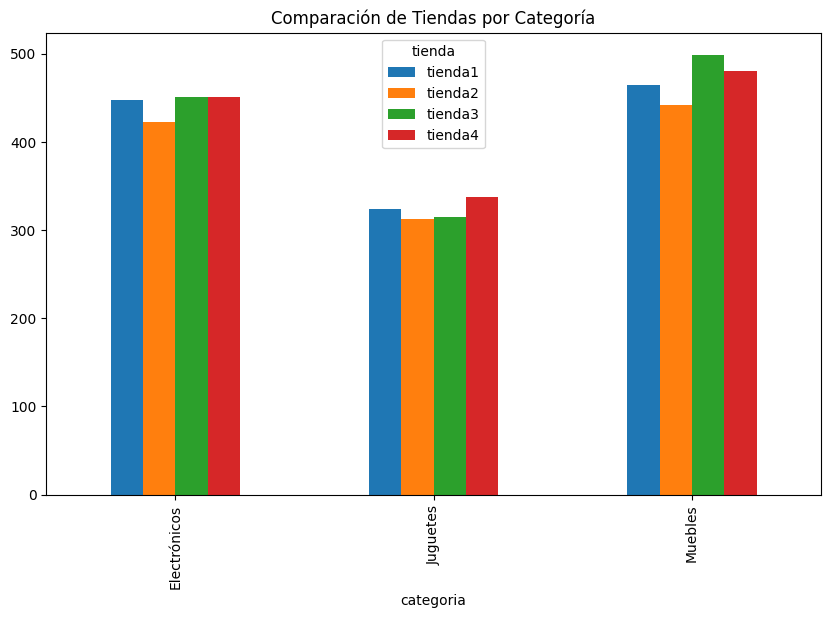

In [113]:
# Crear DataFrame y pivotear
df = pd.DataFrame(top3_categoria_tienda_global)
df_pivot = df.pivot(index="categoria", columns="tienda", values="total_ventas")
# Graficar
df_pivot.plot(kind="bar", figsize=(10,6), title="Comparación de Tiendas por Categoría")

#Categoria menos vendida: Eletronicos tienda 2, Juguetes tienda 2 y 3, Muebles 2

##Opiniones de los clientes - Grafico

In [44]:
print(calificacion_tienda_global)

[{'tienda': 'tienda1', 'calificacion': 3.976685036032217}, {'tienda': 'tienda2', 'calificacion': 4.037303942348453}, {'tienda': 'tienda3', 'calificacion': 4.048325561678677}, {'tienda': 'tienda4', 'calificacion': 3.9957591178965224}]


<Axes: title={'center': 'Calificación promedio por tienda (ordenado)'}, xlabel='tienda'>

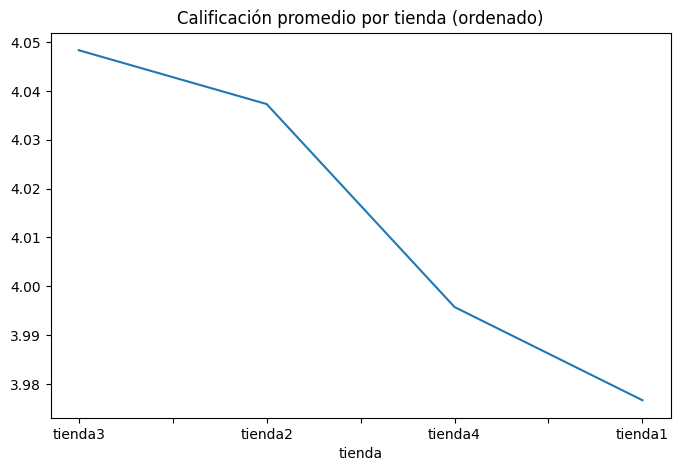

In [118]:
# DataFrame
df = pd.DataFrame(calificacion_tienda_global).sort_values("calificacion", ascending=False).set_index("tienda")
# Gráfico
df.plot(kind="line", figsize=(8,5), title="Calificación promedio por tienda (ordenado)", legend=False)

##Tiendas 4 y 1 con peor calificación

##Los productos más vendidos - Grafico

In [72]:
print (top3_productos_venta_tienda)

[{'tienda': 'tienda1', 'ranking': 1, 'producto': 'Microondas', 'cantidad': 60}, {'tienda': 'tienda1', 'ranking': 2, 'producto': 'TV LED UHD 4K', 'cantidad': 60}, {'tienda': 'tienda1', 'ranking': 3, 'producto': 'Armario', 'cantidad': 60}, {'tienda': 'tienda2', 'ranking': 1, 'producto': 'Iniciando en programación', 'cantidad': 65}, {'tienda': 'tienda2', 'ranking': 2, 'producto': 'Microondas', 'cantidad': 62}, {'tienda': 'tienda2', 'ranking': 3, 'producto': 'Batería', 'cantidad': 61}, {'tienda': 'tienda3', 'ranking': 1, 'producto': 'Kit de bancas', 'cantidad': 57}, {'tienda': 'tienda3', 'ranking': 2, 'producto': 'Mesa de comedor', 'cantidad': 56}, {'tienda': 'tienda3', 'ranking': 3, 'producto': 'Cama king', 'cantidad': 56}, {'tienda': 'tienda4', 'ranking': 1, 'producto': 'Cama box', 'cantidad': 62}, {'tienda': 'tienda4', 'ranking': 2, 'producto': 'Cubertería', 'cantidad': 59}, {'tienda': 'tienda4', 'ranking': 3, 'producto': 'Dashboards con Power BI', 'cantidad': 56}]


<Axes: title={'center': 'Top 3 productos más vendidos por tienda (comparado)'}, xlabel='ranking'>

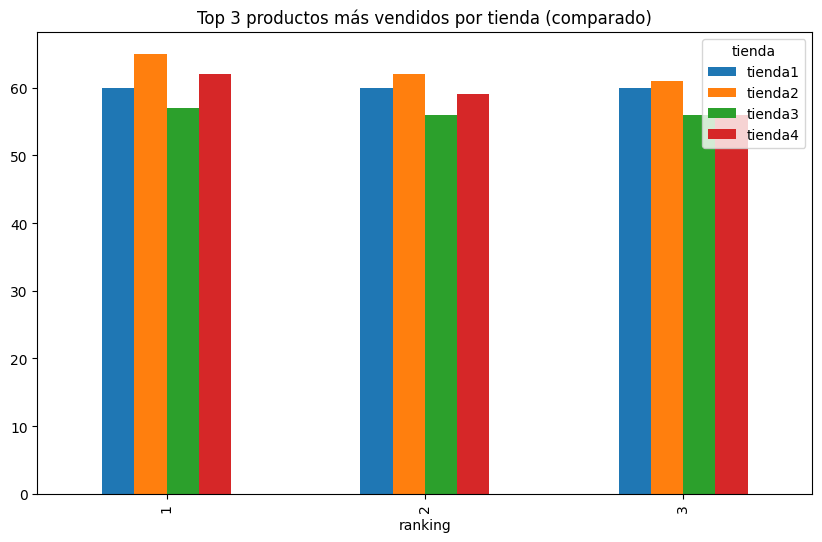

In [107]:
# Datos
df = pd.DataFrame(top3_productos_venta_tienda)
# Pivot
pivot_df = df.pivot(index="ranking", columns="tienda", values="cantidad")
# Gráfico de columnas agrupadas
pivot_df.plot(kind="bar", figsize=(10,6), title="Top 3 productos más vendidos por tienda (comparado)")

#Top productos vendidos: Top1 Tienda 3, Top 2 Tienda 3 y Top 3 tienda 3 y 4

##Los costes de envío

In [36]:
print(promedio_evio_tienda_global)

[{'tienda': 'tienda1', 'promedio': 26018.60958033065}, {'tienda': 'tienda2', 'promedio': 25216.235693090293}, {'tienda': 'tienda3', 'promedio': 24805.680373039424}, {'tienda': 'tienda4', 'promedio': 23459.457167090754}]


<Axes: title={'center': 'Promedio de costo de envío por tienda (ordenado)'}, ylabel='tienda'>

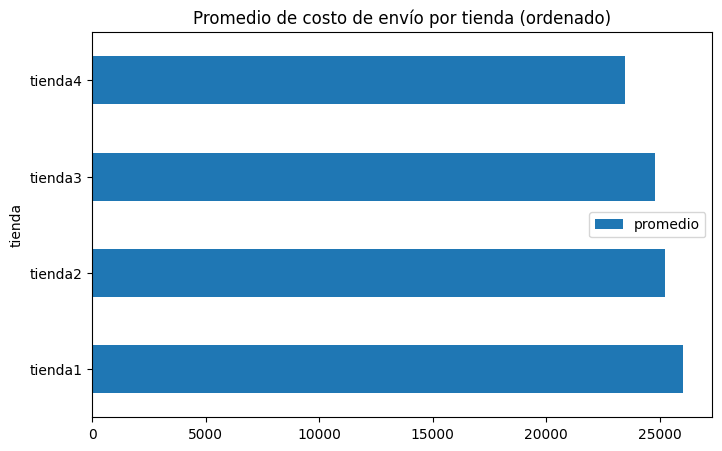

In [105]:
# Datos
df = pd.DataFrame(promedio_evio_tienda_global).sort_values("promedio", ascending=False).set_index("tienda")
# Graficar
df.plot(kind="barh", figsize=(8,5), title="Promedio de costo de envío por tienda (ordenado)")

#Los costos de envio mas altos son de la Tienda 2 y 1.


#Informe Final

##0.Introduccion

El objetivo del análisis fue identificar a qué tienda debería vender el Sr. Juan, evaluando diversos indicadores como ingresos totales, categorías más vendidas, calificaciones de los clientes, productos top y costos de envío promedio. Todos los datos fueron analizados y visualizados mediante gráficos para facilitar la interpretación.

##1. Ingresos Totales


* Tienda 1 generó los mayores ingresos globales.
* Las tiendas 2 y 3 obtuvieron ingresos intermedios.
* Tienda 4 obtuvo los ingresos más bajos.

→ La Tienda 1 destaca en desempeño económico.

##2. Categorías Más Vendidas

* Todas las tiendas tuvieron buen rendimiento en Muebles y Electrónicos.
* Las ventas se mantienen relativamente equilibradas entre tiendas, sin grandes diferencias extremas.

##3. Calificación Promedio

* Tienda 3 obtuvo la mejor calificación de los clientes.
* Le siguen la tienda 2 y la tienda 4.
* Tienda 1 tuvo la calificación más baja.

→ La Tienda 3 destaca en satisfacción del cliente.

##4. Productos Más Vendidos por Tienda

Cada tienda tiene productos líderes distintos:
* Tienda 1: Microondas, TV 4K.
* Tienda 2: Libros y electrodomésticos.
* Tienda 3: Muebles y productos fitness.
* Tienda 4: Cama box, artículos del hogar.

No hay un dominio claro global; cada tienda tiene su nicho definido.

##5. Costo de Envío Promedio

* La tienda con el menor costo promedio de envío es Tienda 4.
* La más costosa es la Tienda 1.

→ La Tienda 4 es más económica operativamente.

#6.Conclusión y Recomendación

Tienda que debería cerrarse (la menos conveniente):  Tienda 4

Justificación resumida:
* Peores ingresos totales de todas las tiendas.
* Aunque tiene un costo de envío bajo, su volumen de ventas es el más débil.
* Calificación de clientes solo promedio, no destaca.
* Sus productos top no generan suficiente peso comercial frente a otras tiendas.
* En conjunto, es la que menos aporta y menos potencial tiene.

→ Es la tienda con menor rendimiento global y la que menos conviene mantener.